## Data Storytelling with Adult Income Data

Data: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

About the Dataset: An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.

##### Question: To what extent do these factors influence an individual's income?

In [1]:
#importing necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and explore the data:

In [2]:
income_data = pd.read_csv("adult.csv")

In [3]:
print(f"The dataset contains {len(income_data)} rows")
print(f"The dataset contains {len(income_data.columns)} columns")

pd.set_option('display.max_columns', len(income_data.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
income_data.head(5)

The dataset contains 48842 rows
The dataset contains 15 columns


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
income_data.drop('fnlwgt', axis=1, inplace=True)

For the purpose of this project, I am going to drop the 'fnlwgt' feature as I do not have a reason to explore  its impact on the overall results. I am going to focus on the other features that are more directly related to demographic and socioeconomic factors, as they are likely to provide more meaningful insights into the dataset.

In [5]:
income_data.info

<bound method DataFrame.info of        age     workclass     education  educational-num      marital-status  \
0       25       Private          11th                7       Never-married   
1       38       Private       HS-grad                9  Married-civ-spouse   
2       28     Local-gov    Assoc-acdm               12  Married-civ-spouse   
3       44       Private  Some-college               10  Married-civ-spouse   
4       18             ?  Some-college               10       Never-married   
...    ...           ...           ...              ...                 ...   
48837   27       Private    Assoc-acdm               12  Married-civ-spouse   
48838   40       Private       HS-grad                9  Married-civ-spouse   
48839   58       Private       HS-grad                9             Widowed   
48840   22       Private       HS-grad                9       Never-married   
48841   52  Self-emp-inc       HS-grad                9  Married-civ-spouse   

              occup

In [6]:
income_data.isna().sum()

#there are no null values in this dataset

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

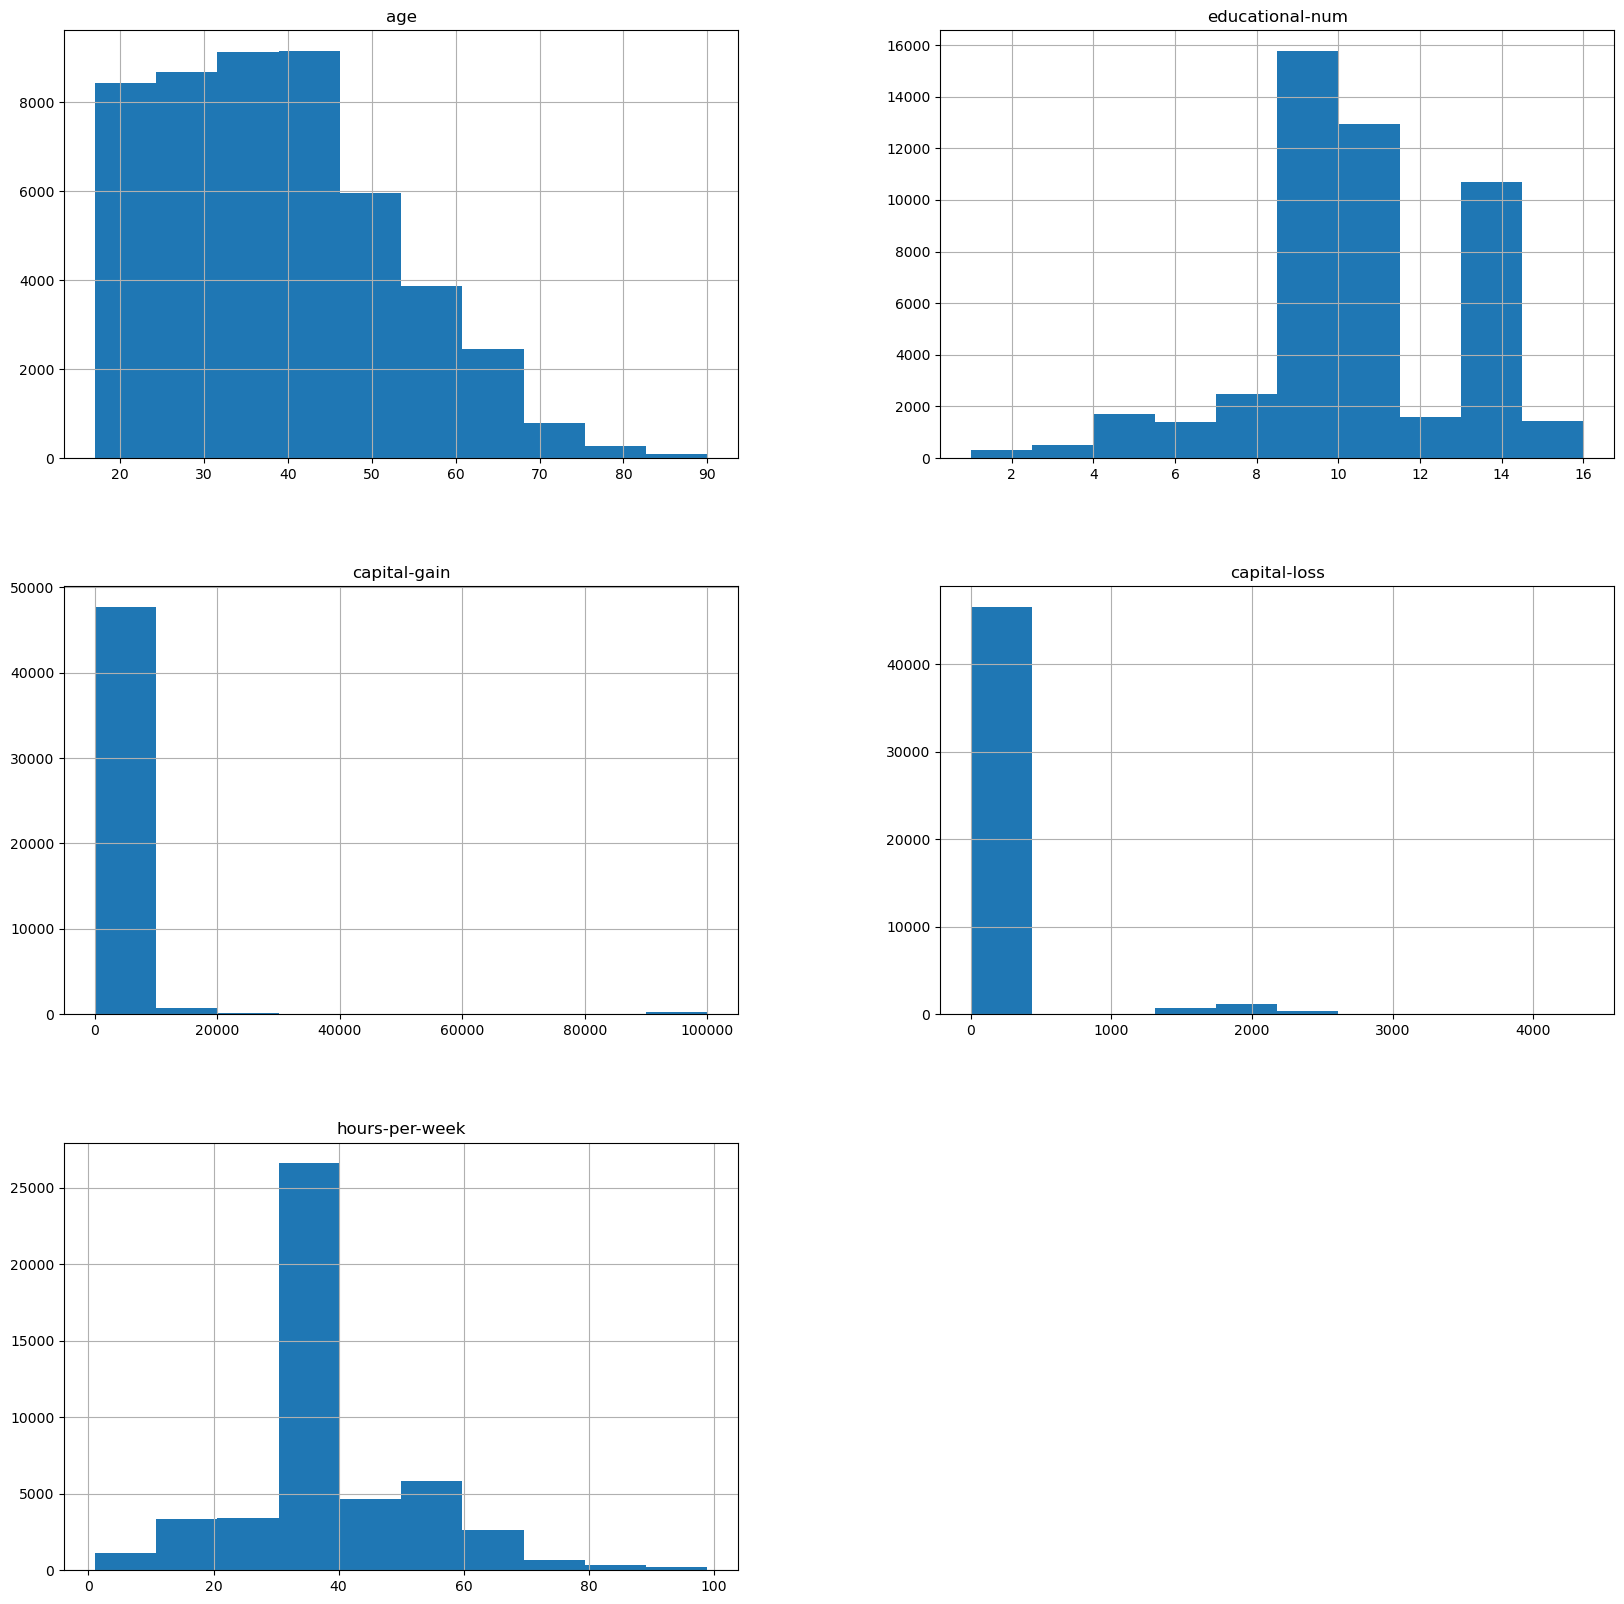

In [7]:
#Plotting distributions of individual features in the dataset

income_data.hist(figsize=(20,20));

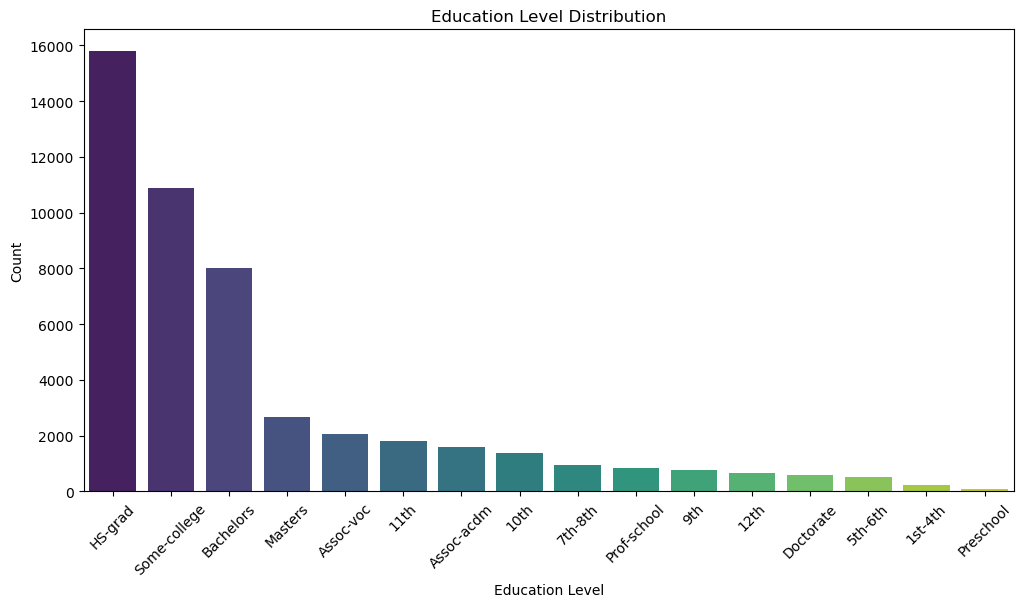

In [9]:
#Education distribution

plt.figure(figsize=(12, 6))
sns.countplot(x='education', data=income_data, order=income_data['education'].value_counts().index, palette='viridis')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

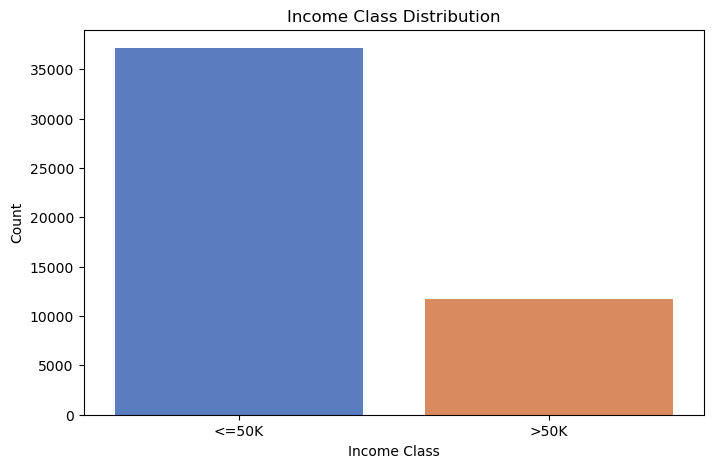

In [10]:
#income class distribution

plt.figure(figsize=(8, 5))
sns.countplot(x='income', data=income_data, palette='muted')
plt.title('Income Class Distribution')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.show()

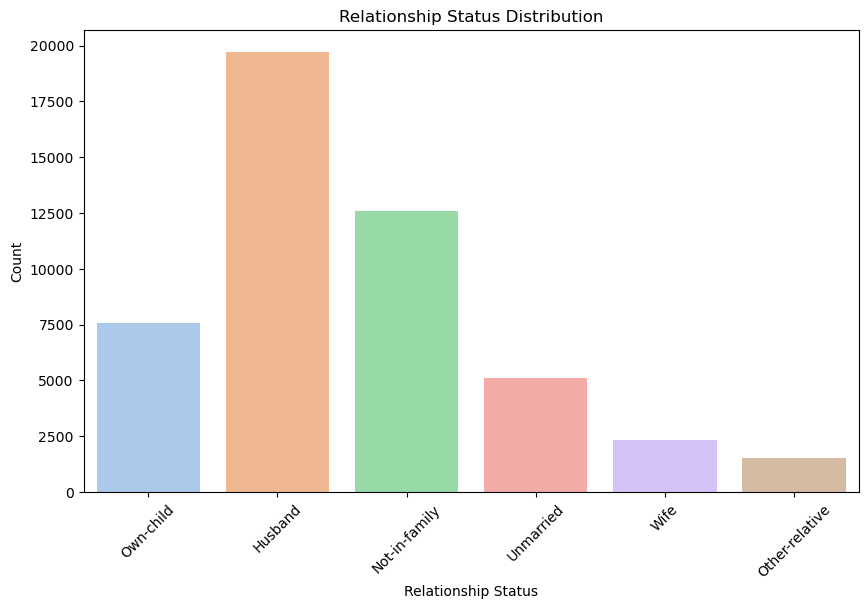

In [11]:
#relationship status distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='relationship', data=income_data, palette='pastel')
plt.title('Relationship Status Distribution')
plt.xlabel('Relationship Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Taking a closer look at income against other features: 

Income vs Years of Education by Gender:

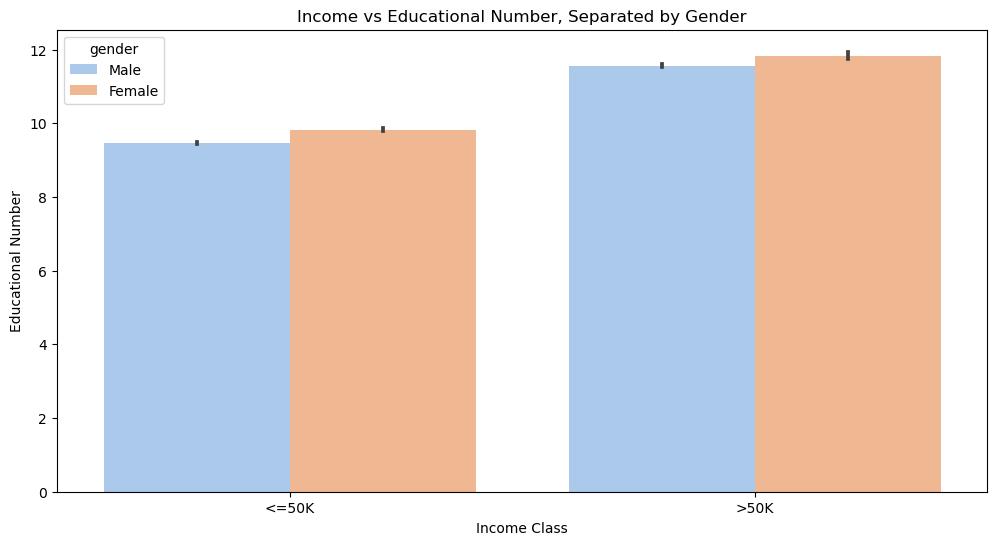

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(x='income', y='educational-num', hue='gender', data=income_data, palette='pastel')
plt.title('Income vs Educational Number, Separated by Gender')
plt.xlabel('Income Class')
plt.ylabel('Educational Number')
plt.show()

Females, on average, completed more years of school compared to males in both categories of under 50k and over 50k. For both males and females, there are more people making over 50k who completed more years of school.

Income vs Age by Gender:

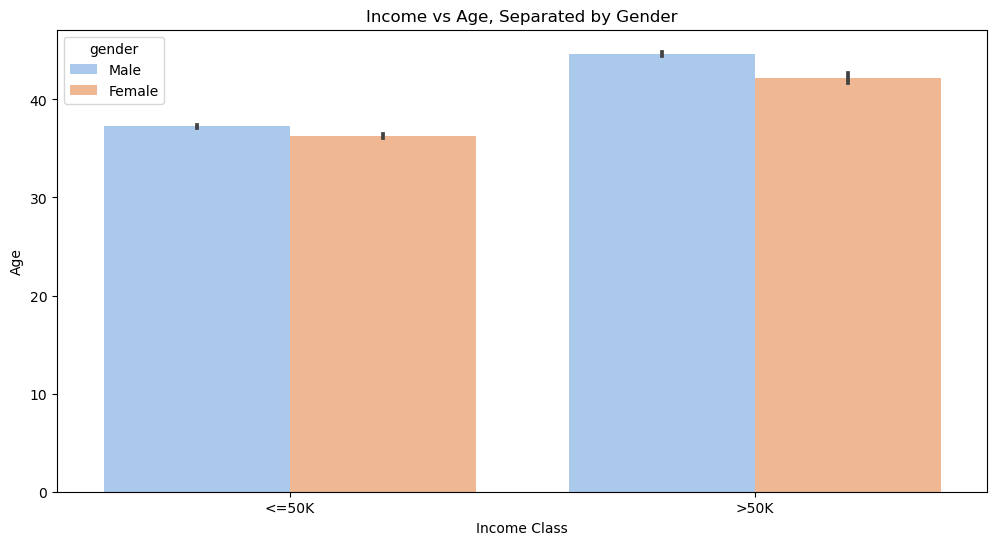

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='income', y='age', hue='gender', data=income_data, palette='pastel')
plt.title('Income vs Age, Separated by Gender')
plt.xlabel('Income Class')
plt.ylabel('Age')
plt.show()

The ages of the males in this dataset is slightly higher than the ages of the females in the dataset. People over the age of 35 are more likely to make over 50k for both males and females. 

Income vs Hours per Week by Gender:

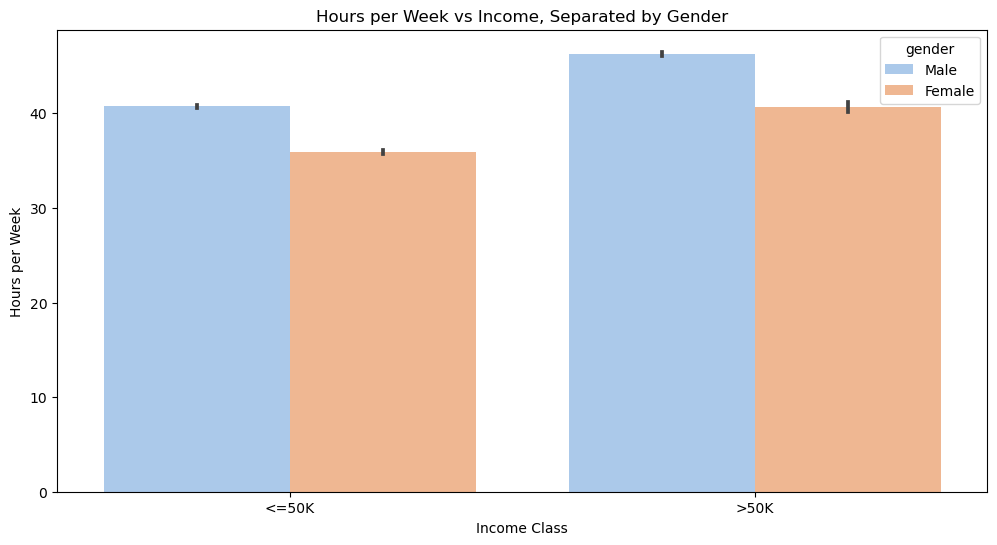

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(x='income', y='hours-per-week', hue='gender', data=income_data, palette='pastel')
plt.title('Hours per Week vs Income, Separated by Gender')
plt.xlabel('Income Class')
plt.ylabel('Hours per Week')
plt.show()

Males tend to work more hours per week in both the under 50k and over 50k categories. Both males and females that work more than 40 hours per week are more likely to be in the over 50k category. 

Count of Gender vs Income:

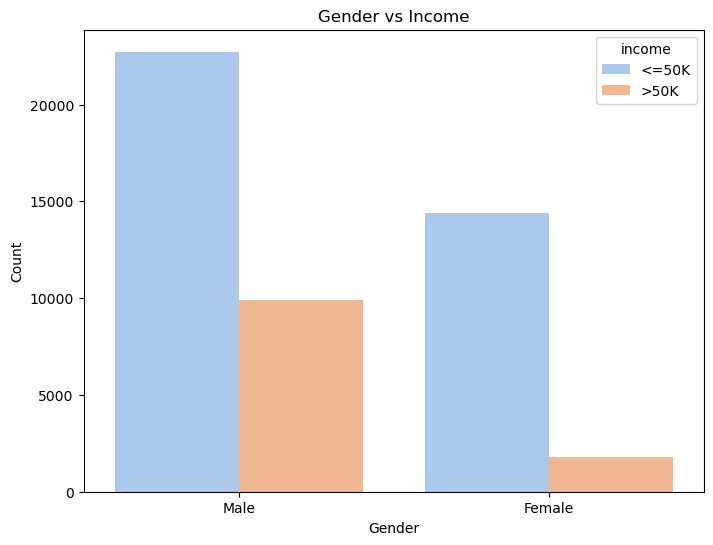

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='income', data=income_data, palette='pastel')
plt.title('Gender vs Income')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There are more males than females in the dataset. There are more people making under 50k than over 50k. 

In [25]:
income_data['gender'].value_counts()

Male      32650
Female    16192
Name: gender, dtype: int64

Workclass vs Income:

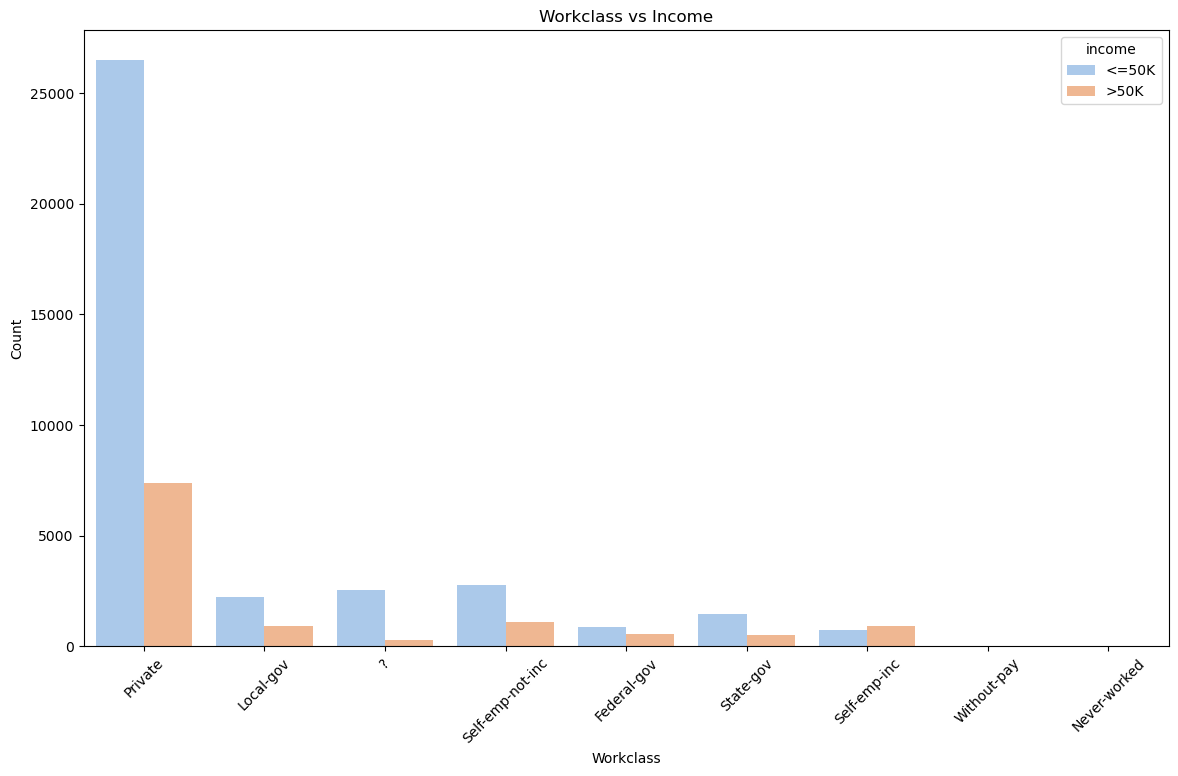

In [26]:
plt.figure(figsize=(14, 8))
sns.countplot(x='workclass', hue='income', data=income_data, palette='pastel')
plt.title('Workclass vs Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

People who are self-employed are the only category where those making more than 50k exceeds those making under 50k.

In [27]:
income_data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

Occupation vs Income: 

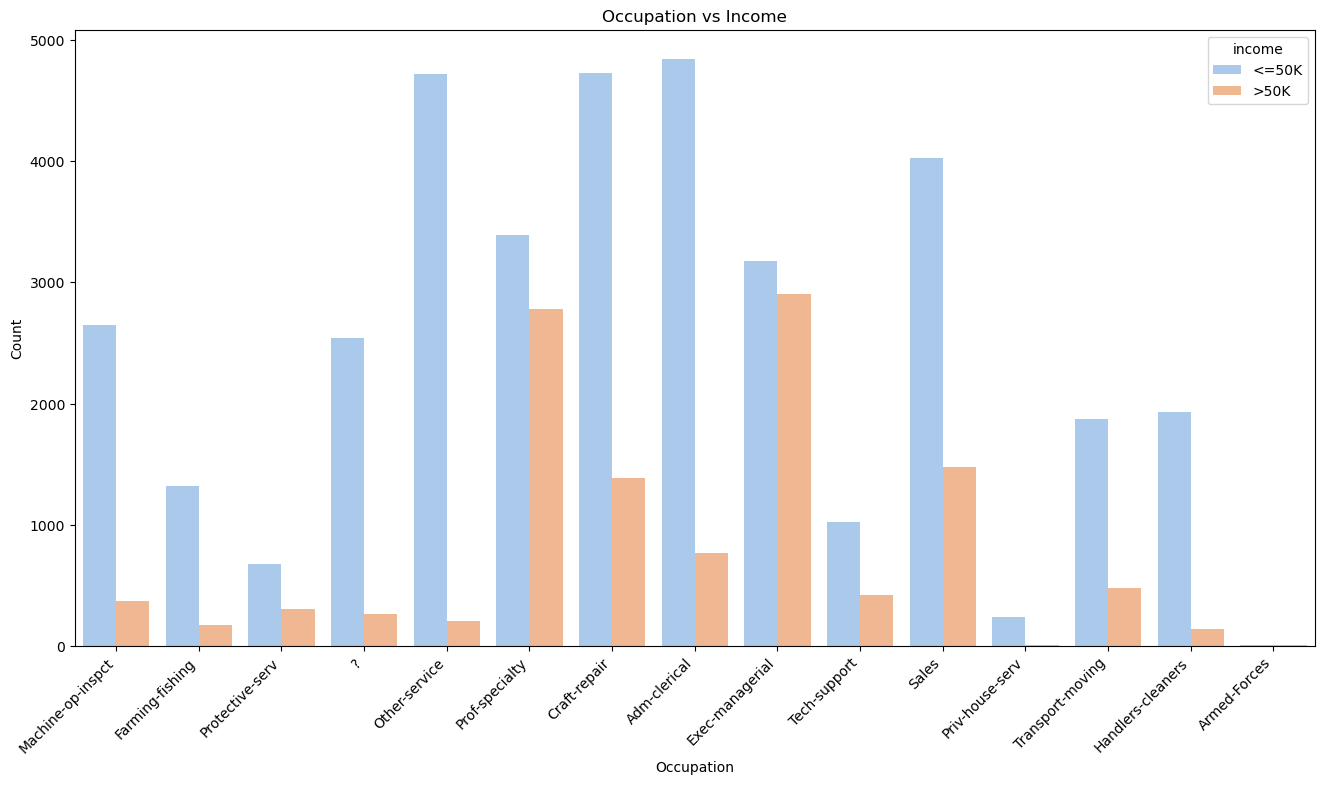

In [28]:
plt.figure(figsize=(16, 8))
sns.countplot(x='occupation', hue='income', data=income_data, palette='pastel')
plt.title('Occupation vs Income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Prof-specialty and exec-managerial are the only occupations where people making less than 50k do not far exceed those making more than 50k, meaning that if you are in those occupations, there is a higher likelihood of making more than 50k. 

Race vs Income:

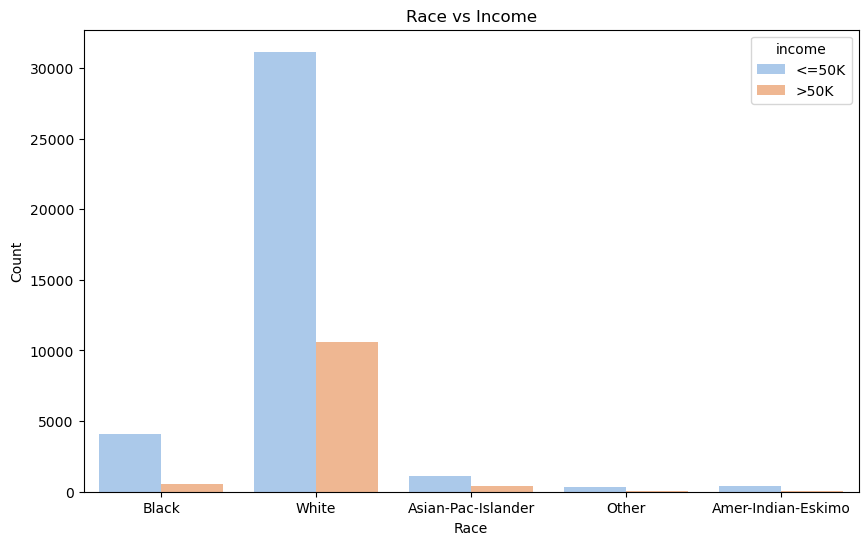

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='income', data=income_data, palette='pastel')
plt.title('Race vs Income')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In [30]:
income_data['race'].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

There could be some sampling bias in this dataset. More males than females, most males in the dataset are married, more people making less than 50k and more white representation. According to the metadata, this dataset was last updated in October of 1996, so it is a pretty outdated representation of income. 

Native Country vs Income (Excluding United States):

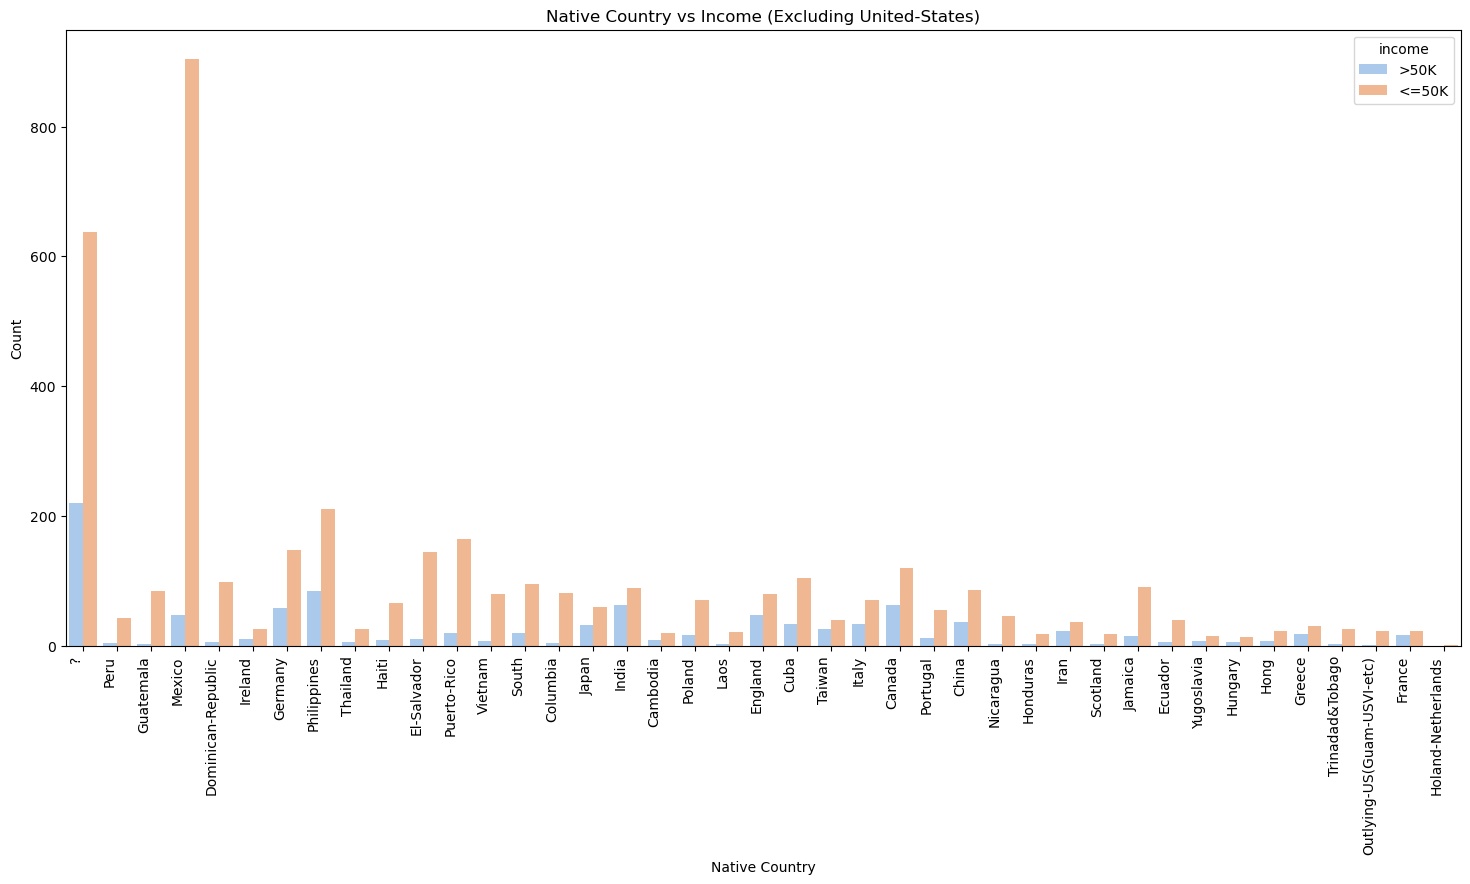

In [35]:
# Exclude 'United-States' from the dataset
income_data_excluding_us = income_data[income_data['native-country'] != 'United-States']

plt.figure(figsize=(18, 8))
sns.countplot(x='native-country', hue='income', data=income_data_excluding_us, palette='pastel')
plt.title('Native Country vs Income (Excluding United-States)')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

## What did we learn from this dataset: 

In this dataset, we observed several interesting trends related to income, education, and demographics. On average, females tend to have higher educational attainment compared to males, regardless of their income level. Individuals with more years of education are generally more likely to earn over $50,000, irrespective of gender. The dataset indicates that males, on average, are slightly older than females. Moreover, individuals over the age of 35 are more likely to have higher incomes, irrespective of gender.

Interestingly, males typically work more hours per week than females, and both genders working more than 40 hours per week are more likely to fall into the over $50,000 income category. The dataset has a higher representation of males and more individuals earning under 50,000. Self-employed individuals are notable as the only category where those earning more than 50,000 exceed those earning less. Occupations like 'Prof-specialty' and 'Exec-managerial' stand out as having a balanced distribution between individuals earning less and more than 50,000.

However, it's crucial to note potential biases in the dataset, such as a higher representation of males, a majority of males being married, and a prevalence of individuals earning less than 50,000. The dataset may not be fully representative, suggesting some sampling bias. Additionally, the dataset is outdated, last updated in October 1996, which may limit its relevance to current income trends.